# Computer Vision - Lab 1
## Student: Nguyen Bao Minh Hoang

In [5]:
!curl -o image.jpg https://helpx.adobe.com/content/dam/help/en/stock/how-to/visual-reverse-image-search/jcr_content/main-pars/image/visual-reverse-image-search-v2_intro.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  219k  100  219k    0     0   562k      0 --:--:-- --:--:-- --:--:--  562k


In [30]:
!ls

image.jpg  main.ipynb


In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import log10

In [69]:
def color_image_histogram_equalization(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    equalized = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return equalized

def negative(image, max_val=255):
    result = image.copy()
    w, h, _ = result.shape
    for x in range(w):
        for y in range(h):
            result[x][y] = max_val - result[x][y]
    return result

def logarithm_transform(image, c=1):
    result = image.copy()
    w, h = image.shape
    for x in range(w):
        for y in range(h):
            result[x][y] = c*log10(result[x][y] + 1)
    return result

# c*r^gamma
def power_transform(image, gamma, c=1):
    result = image.copy()
    w, h = image.shape
    for x in range(w):
        for y in range(h):
            result[x][y] = int(c*(result[x][y]**gamma))
    return result

# Ảnh gốc và histogram của nó

<IPython.core.display.Javascript object>


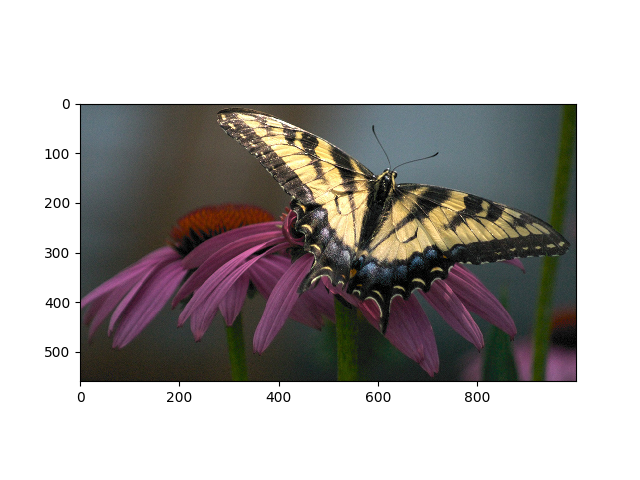

In [94]:
img = cv2.imread('image.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

<IPython.core.display.Javascript object>


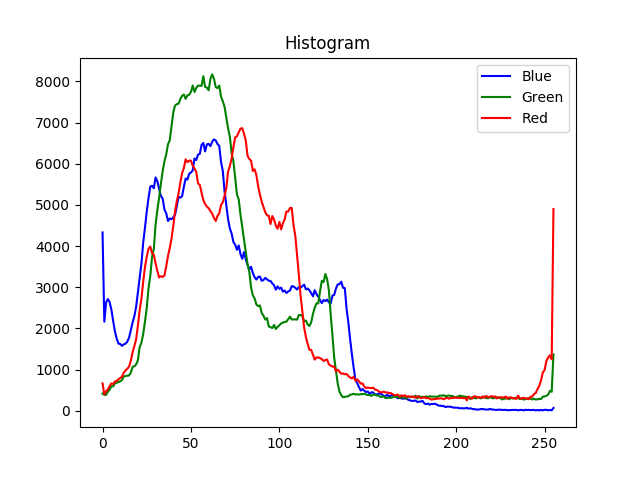

In [95]:
red, green, blue = np.zeros((256,), dtype=int), np.zeros((256,), dtype=int), np.zeros((256,), dtype=int)
w, h, _ = img.shape
for x in range(w):
    for y in range(h):
        b, g, r = img[x][y]
        red[r] += 1
        blue[b] += 1
        green[g] += 1

x = np.arange(256)

plt.plot(x, blue, label="Blue", color="blue")
plt.plot(x, green, label="Green", color="green")
plt.plot(x, red, label="Red", color="red")
plt.title('Histogram')
plt.legend()
plt.show()

# Ảnh và hist sau khi cân bằng hist

<IPython.core.display.Javascript object>


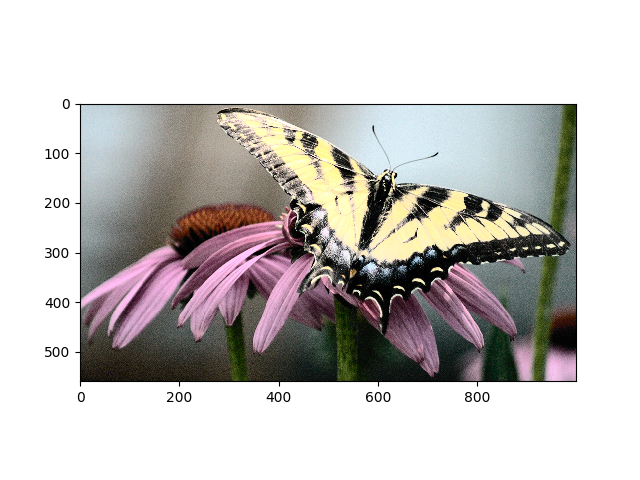

In [96]:
equalized = color_image_histogram_equalization(rgb)
plt.imshow(equalized)
plt.show()

<IPython.core.display.Javascript object>


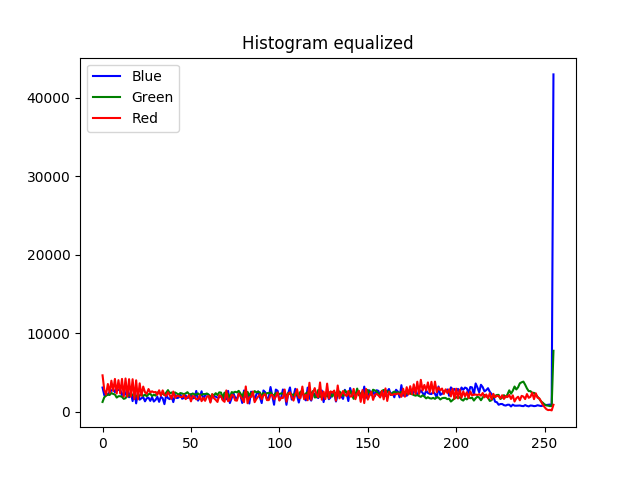

In [97]:
red, green, blue = np.zeros((256,), dtype=int), np.zeros((256,), dtype=int), np.zeros((256,), dtype=int)
w, h, _ = equalized.shape
for x in range(w):
    for y in range(h):
        b, g, r = equalized[x][y]
        red[r] += 1
        blue[b] += 1
        green[g] += 1

x = np.arange(256)

plt.plot(x, blue, label="Blue", color="blue")
plt.plot(x, green, label="Green", color="green")
plt.plot(x, red, label="Red", color="red")
plt.title('Histogram equalized')
plt.legend()
plt.show()

# Ảnh đảo

<IPython.core.display.Javascript object>


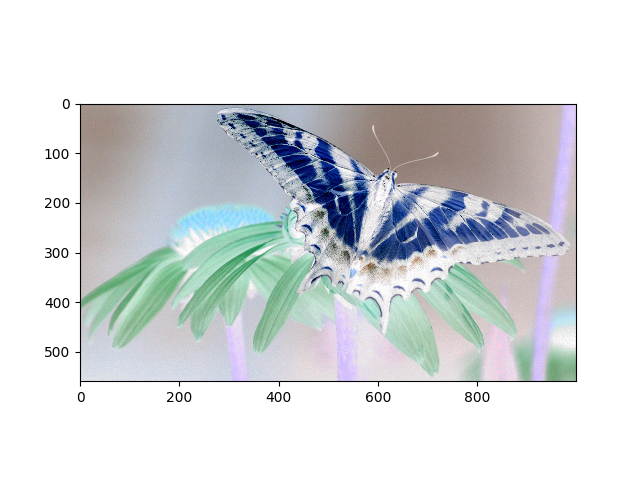

In [98]:
negative_img = negative(rgb)
plt.figure('Ảnh đảo')
plt.imshow(negative_img)
plt.show()

<IPython.core.display.Javascript object>


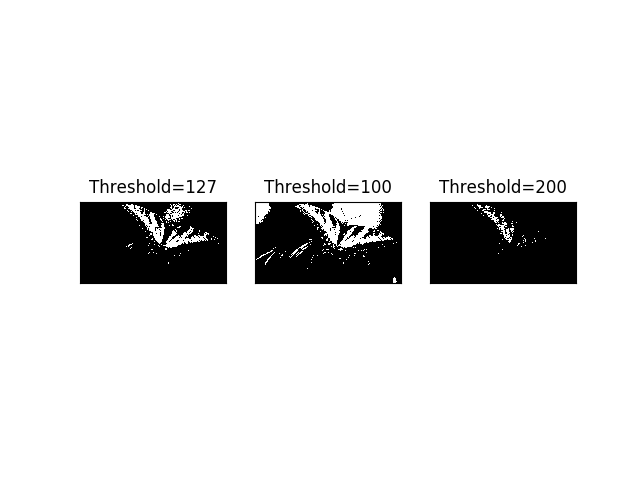

In [99]:
# %matplotlib notebook
plt.figure('Cắt ảnh với các ngưỡng 127, 100 và 200')

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


_, gray_127 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.subplot(131)
plt.xticks([]), plt.yticks([])
plt.title('Threshold=127')
plt.imshow(gray_127, 'gray')


_, gray_100 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
plt.subplot(132)
plt.xticks([]), plt.yticks([])
plt.title('Threshold=100')
plt.imshow(gray_100, 'gray')

_, gray_200 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
plt.subplot(133)
plt.xticks([]), plt.yticks([])
plt.title('Threshold=200')
plt.imshow(gray_200, 'gray')


plt.show()


# Biến đổi Logarit

<IPython.core.display.Javascript object>


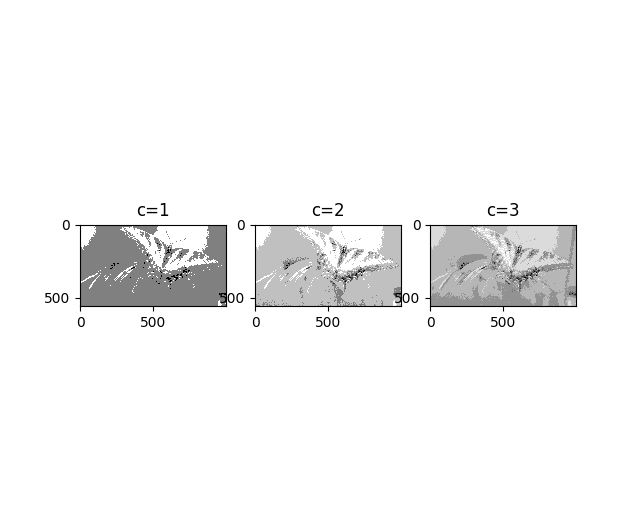

In [100]:
plt.figure('Biến đổi Logarit với c lần lượt là 1, 2 và 3')

lgr = logarithm_transform(gray)
plt.subplot(131)
plt.imshow(lgr, 'gray')
plt.title('c=1')

lgr_2 = logarithm_transform(gray, c=2)
plt.subplot(132)
plt.title('c=2')
plt.imshow(lgr_2, 'gray')

lgr_3 = logarithm_transform(gray, c=3)
plt.subplot(133)
plt.title('c=3')
plt.imshow(lgr_3, 'gray')


plt.show()

# Biến đổi hàm mũ

<IPython.core.display.Javascript object>


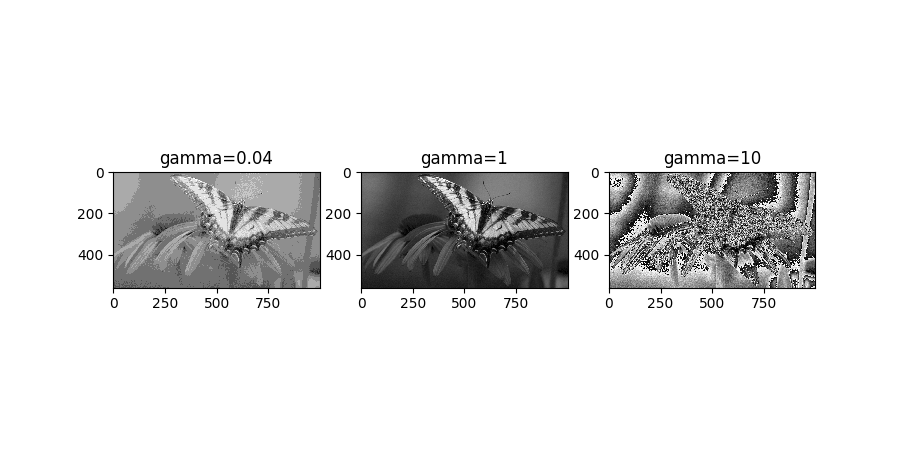

In [101]:
plt.figure('Biến đổi mũ với gamma lần lượt là 0.04, 1 và 2')

pwr = power_transform(gray, .4)
plt.subplot(131)
plt.imshow(pwr, 'gray')
plt.title('gamma=0.04')

pwr_2 = power_transform(gray, 1)
plt.subplot(132)
plt.title('gamma=1')
plt.imshow(pwr_2, 'gray')

pwr_3 = power_transform(gray, 1.4)
plt.subplot(133)
plt.title('gamma=10')
plt.imshow(pwr_3, 'gray')


plt.show()

# Lọc tương quan

<IPython.core.display.Javascript object>


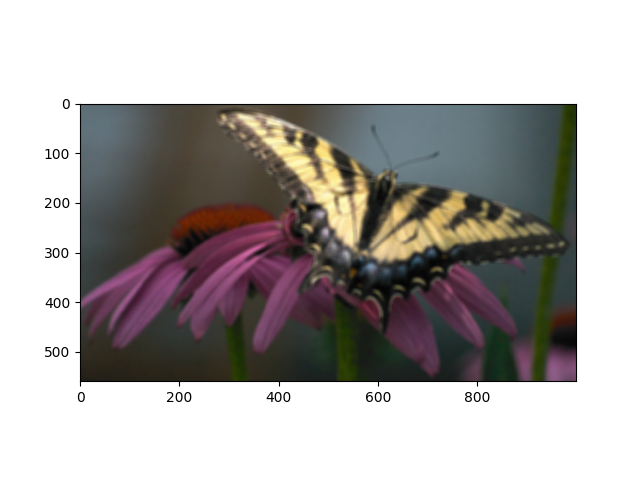

In [102]:
# Lọc trung bình với kích thước 9x9
blurred = cv2.blur(rgb, (9, 9))
plt.imshow(blurred)
plt.show()


# Lọc tích chập

<IPython.core.display.Javascript object>


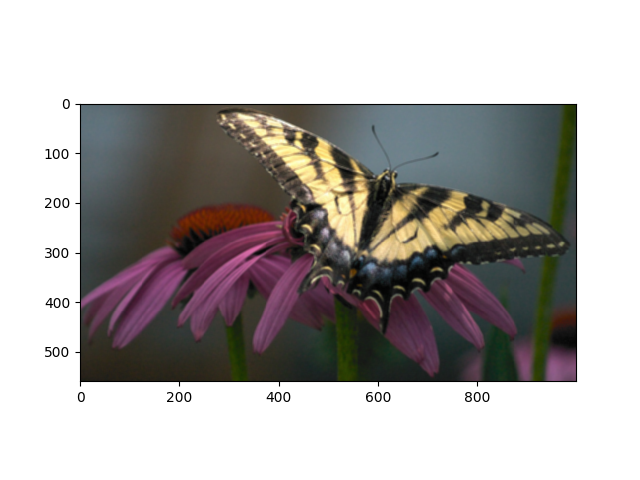

In [103]:
kernel = np.ones((5,5),np.float32)/25
filterred = cv2.filter2D(rgb, -1, kernel)
plt.imshow(filterred)
plt.show()